In [1]:
import sys
import copy
sys.path.insert(0, "..")
import numpy as np
import matplotlib.pyplot as plt
from classes.kmeans import KMeans

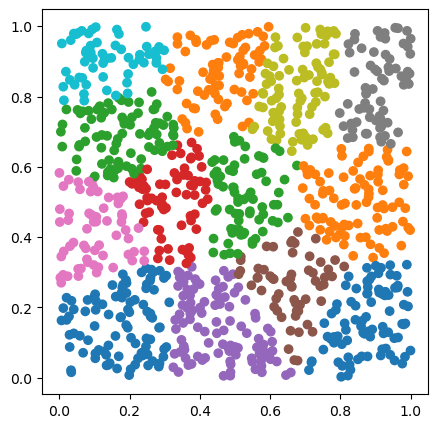

In [6]:
fig, ax = plt.subplots(figsize=(5,5))
X = np.random.rand(1000, 2)  # 1000 data points, 2 features
kmeans = KMeans(n_clusters=13, max_iter=300)
init_mus = np.random.rand(13, 2)
kmeans.fit(X, init_mus=init_mus)
labels = kmeans.predict(X)
ax.scatter(X[:,0],X[:,1],c=[f'C{l}' for l in labels])
ax.set_aspect('equal')